<a href="https://colab.research.google.com/github/NoeZGravity/IS403.N21.HTTT-Nhom9/blob/20521720---Truong-Y-Nhi/LSTM_MSFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# 2. Đọc file csv và gắn index với giá Close
df = pd.read_csv('/content/MSFT.csv')
df1=df.reset_index()['Close']

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,83.599998,84.809998,83.220001,84.260002,79.150635,29532100
1,2017-12-04,84.419998,84.430000,80.699997,81.080002,76.163467,39094900
2,2017-12-05,81.339996,82.680000,80.980003,81.589996,76.642525,26152300
3,2017-12-06,81.550003,83.139999,81.430000,82.779999,77.760399,26162100
4,2017-12-07,82.540001,82.800003,82.000000,82.489998,77.487968,23184500


In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 20s 638ms/step - loss: 0.0354 - val_loss: 0.0470
Epoch 2/100
14/14 [==============================] - 3s 210ms/step - loss: 0.0045 - val_loss: 0.0076
Epoch 3/100
14/14 [==============================] - 3s 240ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 4/100
14/14 [==============================] - 5s 340ms/step - loss: 8.6539e-04 - val_loss: 0.0039
Epoch 5/100
14/14 [==============================] - 3s 198ms/step - loss: 7.9969e-04 - val_loss: 0.0029
Epoch 6/100
14/14 [==============================] - 3s 198ms/step - loss: 7.7661e-04 - val_loss: 0.0041
Epoch 7/100
14/14 [==============================] - 3s 200ms/step - loss: 8.3434e-04 - val_loss: 0.0035
Epoch 8/100
14/14 [==============================] - 3s 254ms/step - loss: 7.5956e-04 - val_loss: 0.0030
Epoch 9/100
14/14 [==============================] - 3s 220ms/step - loss: 7.5293e-04 - val_loss: 0.0035
Epoch 10/100
14/14 [==============================] - 3s 200ms/ste

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 27ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_mae = np.mean(np.abs((y_pred_val - yval)))
test_mae = np.mean(np.abs((y_pred - ytest)))
valid_mape = np.mean(np.abs((y_pred_val - yval)/yval))
test_mape = np.mean(np.abs((y_pred - ytest)/ytest))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 261.6002599080552
Testing RMSE: 283.87875142834616
Validation MAE: 261.4125323260195
Testing MAE: 283.2441615591845
Validation MAPE: 378.60240239970483
Testing MAPE: 377.7937614809748


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
while(i<30):

    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.750704]
101
1 day input [0.56020304 0.5640194  0.54738008 0.6178682  0.63362977 0.61241084
 0.6140137  0.61309775 0.61290692 0.61115143 0.61431901 0.62569174
 0.63542347 0.63508001 0.61321224 0.60775488 0.66427511 0.66255777
 0.66381717 0.6454223  0.6260352  0.62317293 0.63473649 0.62718012
 0.65423808 0.67106828 0.67221315 0.64088083 0.62439419 0.60821282
 0.61336493 0.62340191 0.59958787 0.60164868 0.59489377 0.58561999
 0.61034997 0.60580855 0.60489261 0.5648972  0.53898411 0.54898294
 0.55734077 0.56394311 0.5903523  0.60080908 0.60355686 0.60783122
 0.59050493 0.57569744 0.60733507 0.61634168 0.61428081 0.60882345
 0.63702633 0.63763696 0.61683783 0.63630121 0.65515402 0.70037788
 0.67652565 0.67049574 0.71167427 0.70850674 0.69663781 0.69465334
 0.7260238  0.72926773 0.71839109 0.69102776 0.67541887 0.65484871
 0.65042172 0.66286308 0.64168229 0.64526968 0.64244555 0.63042405
 0.6488952  0.66484755 0.6708774  0.6604969  0.65877955 0.65351302
 0.63927796 0.65961916 0.68583757 0

Validation RMSE: 261.6002599080552
Testing RMSE: 283.87875142834616
Validation MAE: 261.4125323260195
Testing MAE: 283.2441615591845
Validation MAPE: 378.60240239970483
Testing MAPE: 377.7937614809748


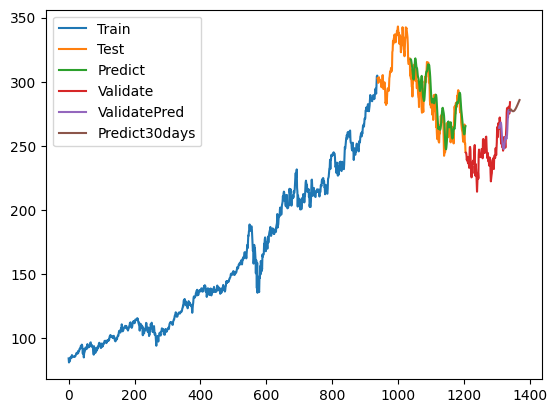

In [ ]:
# 14.Vẽ hình
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+time_step+1, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+time_step+1, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()